## Customer Churn Prediction

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

### Building Models

In [87]:
df = pd.read_csv("telco_clean_20201215.csv")
df.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,5.463515,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,43.468379,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,10.399519,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,42.903963,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,12.314625,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [88]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [89]:
print("Percentage of Churned Customer:%",
      round(df.Churn.mean(),2))

Percentage of Churned Customer:% 0.27


> **Target variable is a bit of imbalanced. We should resample the data.**

In [90]:
X=df.drop('Churn',axis=1)
y=df.Churn

### Standarization
Generally, most of the datasets have very different scales and contain some very large outliers. These two characteristics lead to difficulties to visualize the data and, more importantly, they can degrade the predictive performance of many machine learning algorithms.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42) # stratify=y

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# ``1.XGBoost Classifer``

In [93]:
xgb= XGBClassifier()
xgb.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
y_pred = xgb.predict(X_test)

### **Evaluate the performance**

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1539
           1       0.63      0.48      0.55       574

    accuracy                           0.78      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



In [96]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='macro')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score)

xgb_accuracy: 0.7832465688594415 
xgb_f1_score: 0.7020608590709816


### **Tunning XGBOOST**

In [134]:
xgb_params = {"n_estimators": [50,500,1000],
             "subsample":[0.1,0.5,1],
             "max_depth":[3,7,9],
             "learning_rate":[0.1,0.01,0.3]}

In [135]:
xgb_grid= GridSearchCV(xgb, xgb_params, cv = 5, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  5.8min finished


In [136]:
xgb_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}

In [150]:
xgb_tuned = XGBClassifier(learning_rate= 0.01, 
                                max_depth= 3, 
                                n_estimators= 1000, 
                                subsample= 0.1).fit(X_train, y_train)

In [151]:
y_pred = xgb_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1539
           1       0.69      0.55      0.61       574

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [152]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='macro')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score)

xgb_accuracy: 0.8116422148603881 
xgb_f1_score: 0.7438553849902534


### Visualization of Confusion Matrix with Table

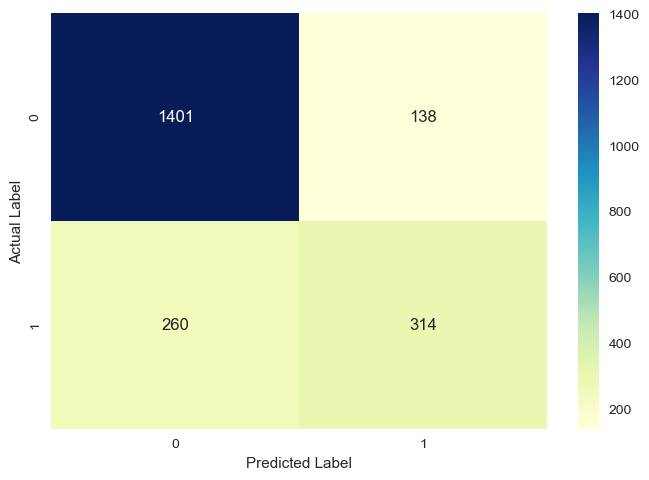

In [103]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

# ``2.Random Forest Classifier``

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [105]:
y_pred = rfc.predict(X_test)

### **Evaluate the performance**

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1539
           1       0.68      0.47      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.78      0.80      0.78      2113



In [107]:
rfc_accuracy = rfc.score(X_test,y_test)
rfc_f1_score = f1_score(y_test, y_pred, average='macro')
print('rfc_accuracy:',rfc_accuracy,
      '\nrfc_f1_score:',rfc_f1_score)

rfc_accuracy: 0.7960246095598675 
rfc_f1_score: 0.7126870627578101


### **RF Tunning**

In [143]:
rfc_params = {"n_estimators":[300,500,1000],
              "max_depth":[7,10,15],
              "max_features": [8,10,15],
              "min_samples_split": [4,6,8]}

In [144]:
rfc_grid = GridSearchCV(rfc, rfc_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  6.5min finished


In [145]:
rfc_grid.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_split': 4,
 'n_estimators': 500}

In [153]:
rfc_tuned = RandomForestClassifier(max_depth = 10,             
                                  max_features = 10, 
                                  min_samples_split = 4, 
                                  n_estimators = 500).fit(X_train, y_train)

In [155]:
y_pred = rfc_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.51      0.58       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



### **Visualization of Confusion Matrix with Table**

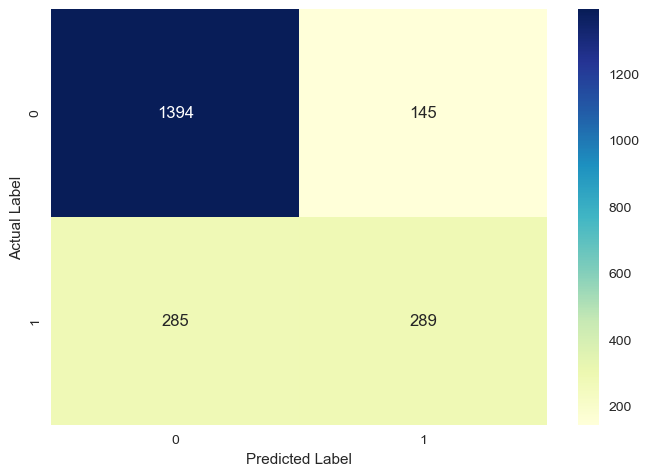

In [113]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

# ``3.KNeighborsClassifer``

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [116]:
y_pred = knn.predict(X_test)

### **Visualize Accuracies of Train & Test Data by Different k`s**

In [117]:
neighbors = range(1,8,2) # k nin tek sayi olmasi beklenir.
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

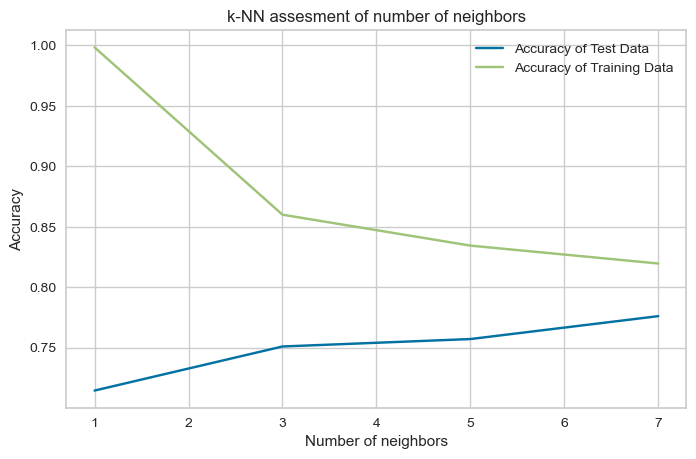

In [118]:
plt.figure(figsize=(8,5))
plt.title('k-NN assesment of number of neighbors')
plt.plot(neighbors, test_accuracy, label='Accuracy of Test Data')
plt.plot(neighbors, train_accuracy, label='Accuracy of Training Data')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### **Find Optimum K Value with Elbow Method**

In [119]:
error_rate = []
# Her bir error rate icin olusan k degeri bu listeye atilacak
# k nin tek sayi olmasi beklenir.
# Will take some time
for i in range(1,8,2):
    
    model = KNeighborsClassifier(n_neighbors=i) # k= i
    model.fit(X_train,y_train)
    y_pred_i = model.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test)) 
    

print('Optimum K_Value: ',error_rate.index(min(error_rate)))

Optimum K_Value:  3


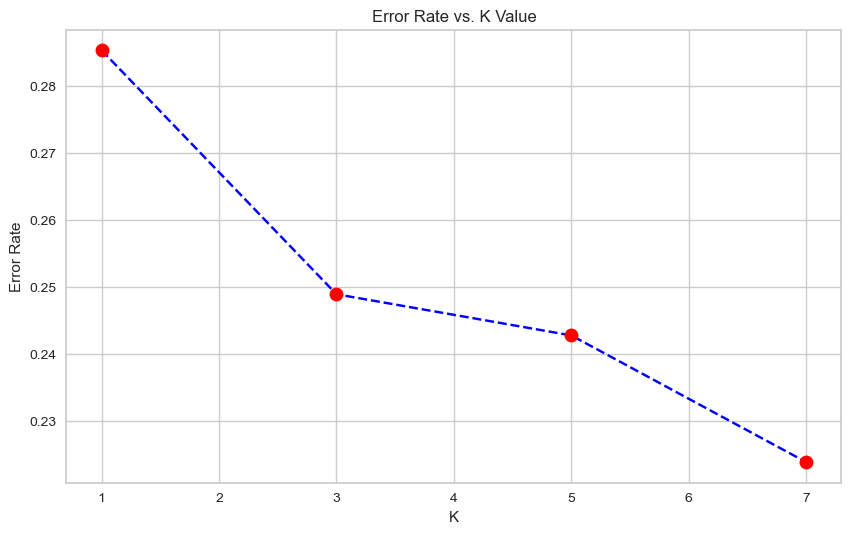

In [120]:
plt.figure(figsize=(10,6))
plt.plot(range(1,8,2),
         error_rate,
         color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

### Tunning KNN with GridSearchCV

In [121]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": range(1,18,2)} # k tek sayi olmali

knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [122]:
knn_cv_model.best_params_

{'n_neighbors': 17}

In [123]:
knn_tuned= KNeighborsClassifier(n_neighbors = 33).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)

### **Evaluate the Performance**

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1539
           1       0.65      0.57      0.61       574

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.79      0.80      0.80      2113



In [125]:
knn_accuracy = knn_tuned.score(X_test,y_test)
knn_f1_score = f1_score(y_test, y_pred, average='macro')
print('knn_accuracy:',knn_accuracy,
      '\nknn_f1_score:',knn_f1_score)

knn_accuracy: 0.8007572172266919 
knn_f1_score: 0.7367352223509585


### Visualization of Confusion Matrix with Table

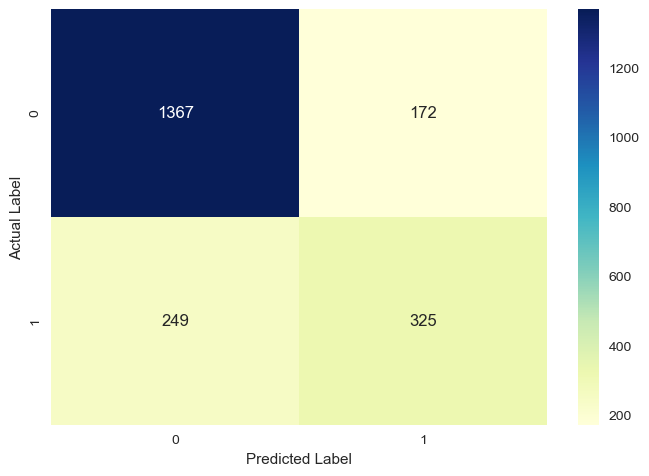

In [126]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

# `4-Logistic Regression`

In [127]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [128]:
y_pred=model.predict(X_test)

### **Evaluate the performance**

In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.69      0.53      0.60       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [130]:
confusion_matrix(y_test, y_pred)

array([[1401,  138],
       [ 267,  307]], dtype=int64)

In [131]:
log_accuracy = model.score(X_test,y_test)
log_f1_score = f1_score(y_test, y_pred, average='macro')
print('log_accuracy:',log_accuracy,
      '\nlog_f1_score:',log_f1_score)

log_accuracy: 0.808329389493611 
log_f1_score: 0.738132636134217


# ``F1 Score Comparison``

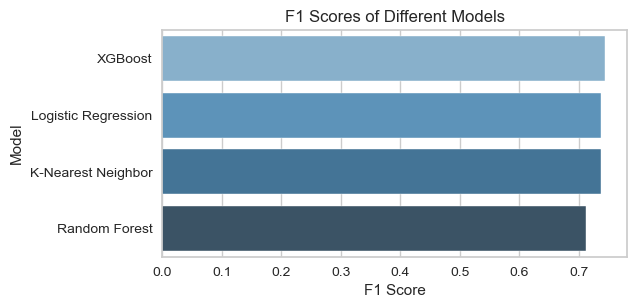

In [132]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Random Forest", "XGBoost","Logistic Regression"],
                        "F1 Score": [knn_f1_score, rfc_f1_score, xgb_f1_score, log_f1_score]})
 
compare = compare.sort_values(by="F1 Score", ascending=False)

plt.figure(figsize=(6,3))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title("F1 Scores of Different Models", size=12);